In [154]:
import pandas as pd
pd.set_option('display.max_rows', None)
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('windwop_new copy.csv')

In [156]:
#df.columns

In [157]:
siemens_values = {'Gamesa', 'Siemens','Siemens Gamesa Renewable Energy'} 
df['Manufacturer'] = df['manufact'].replace(siemens_values, 'Siemens Gamesa')

In [158]:

years_range = pd.date_range(start='1983-01-01', end='2021-12-31', freq='Y').year
manufacturers = df.Manufacturer.unique()
combos = list(product(manufacturers, years_range))

df_full = (pd.DataFrame(combos, columns=['Manufacturer', 'year']))

df_fill = (df.groupby(['Manufacturer','year'])['turbine_capacity'].agg(['sum', 'count'])
      .reset_index())

df_cum_ave = (pd.merge(df_full, df_fill, on=['Manufacturer', 'year'], how='left').fillna(1)
.sort_values(by=['Manufacturer', 'year'])
.loc[lambda df: df['Manufacturer'] != '0']
.assign(cumulative_sum=lambda df: df.groupby('Manufacturer')['sum'].cumsum())
.assign(cumulative_count=lambda df: df.groupby('Manufacturer')['count'].cumsum())
.reset_index(drop = True)
.assign(cumulative_average = lambda df: df.cumulative_sum/df.cumulative_count)
)

In [159]:
df_cum_ave.to_csv('cumave.csv')

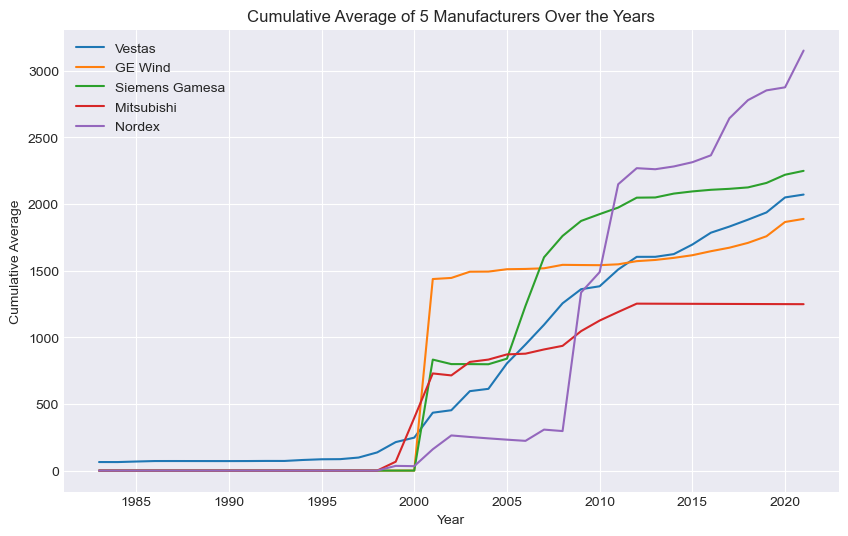

In [161]:
sns.set_style('darkgrid')
manufacturers = ['Vestas', 'GE Wind', 'Siemens Gamesa', 'Mitsubishi', 'Nordex']
df_filtered = df[df['Manufacturer'].isin(manufacturers)]


plt.figure(figsize=(10, 6))
for manufacturer in manufacturers:
    manufacturer_data = df_cum_ave[df_cum_ave['Manufacturer'] == manufacturer]
    plt.plot(manufacturer_data['year'], manufacturer_data['cumulative_average'], label=manufacturer)

plt.xlabel('Year')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of 5 Manufacturers Over the Years')
plt.legend()
plt.grid(True)
plt.show()